我们先来看马氏链的一个具体的例子。社会学家经常把人按其经济状况分成3类：下层(lower-class)、中层(middle-class)、上层(upper-class)，我们用1,2,3 分别代表这三个阶层。社会学家们发现决定一个人的收入阶层的最重要的因素就是其父母的收入阶层。如果一个人的收入属于下层类别，那么他的孩子属于下层收入的概率是 0.65, 属于中层收入的概率是 0.28, 属于上层收入的概率是 0.07。事实上，从父代到子代，收入阶层的变化的转移概率如下:

$ \begin {array} {c|ccc}
\text {父\子}&class 1&class 2&class 3\\
\hline 
class 1 & 0.65 & 0.28 & 0.07 \\
class 2 & 0.15 & 0.67 & 0.18 \\
class 3 & 0.12 & 0.36 & 0.52 \\
\end{array}$

转移矩阵

$\displaystyle p = \begin{bmatrix} 0.65 & 0.28 & 0.07 \\ 0.15 & 0.67 & 0.18 \\ 0.12 & 0.36 & 0.52 \\ \end{bmatrix} $



假设当前这一代人处在下层、中层、上层的人的比例是概率分布向量 $ \pi_0=[\pi_0(1),\pi_0(2),\pi_0(3)] $，那么他们的子女的分布比例将是 $\pi_1 = \pi_0 P$, 他们的孙子代的分布比例将是 $\pi_2=\pi_1 P = \pi_0 P^2$, ......, 第n代子孙的收入分布比例将是 $\pi_n = \pi_0 P^n$

假设初始分布为$\pi_0=[0.21,0.68,0.11]$ 经过n代人后，分布为[0.286， 0.489， 0.225], 从第七代开始，这个分布就稳定不变了。如果用其他的初始分布，发现最终都收敛到分布概率$\pi=[0.286, 0.489, 0.225]$

$P^{20} = P^{21} = ... = P^{100} = \begin{bmatrix} 0.286 & 0.489 & 0.225 \\ 0.286 & 0.489 & 0.225 \\0.286 & 0.489 & 0.225 \\ \end{bmatrix}$

**马氏链定理**： 如果一个非周期马氏链具有转移概率矩阵P,且它的任何两个状态是连通的，那么 $\displaystyle\lim_{n \to \infty} P_{ij}^n$ 存在且与$i$无关，记 $\displaystyle\lim_{n \to \infty}P^n_{ij}=\pi(j)$, 我们有

$
\displaystyle \lim_{n \rightarrow \infty} P^n =\begin{bmatrix} 
\pi(1) & \pi(2) & \cdots & \pi(j) & \cdots \\ 
\pi(1) & \pi(2) & \cdots & \pi(j) & \cdots \\ 
\cdots & \cdots & \cdots & \cdots & \cdots \\ 
\pi(1) & \pi(2) & \cdots & \pi(j) & \cdots \\ 
\cdots & \cdots & \cdots & \cdots & \cdots \\ 
\end{bmatrix}
$

$ \displaystyle \pi(j) = \sum_{i=0}^{\infty}\pi(i)P_{ij}$

$\displaystyle \pi = [\pi(1), \pi(2), \cdots, \pi(j),\cdots ], \quad \sum_{i=0}^{\infty} \pi_i = 1$

### Markov Chain

就是在已知过程”现在“的条件下，其”将来“不依赖于过去。

Markov Chain 通常用条件分布率来表示，定义为 $P(X_{m+n} = a_j \mid X_{t_1}=a_{i_1}, X_{t_2}=a_{i_2},\cdots, X_{t_r}=a_{i_r},X_{t_m}=a_{i}) = P(X_{m+n} = a_j \mid X_m = a_i)$ 

$P_{ij}(m, m+n) = P(X_{m+n}=a_j \mid X_m=a_i) $ 为马氏链在时刻m处于状态$a_i$条件下，在时刻 m+n 转移到状态$a_j$的转移概率. 

Note: 我们定义链的状态空间, 即X可取值的范围。 $ I = \lbrace a_1, a_2, \cdots \rbrace, a_i \in \Bbb R $。 其概率就时落在某则状态$a_x$上的可能性。转换概率就是有多少$a_x$ 变化到$a_y$

由于链在时刻m从任何一个状态$a_i$出发，到另一个时刻m+n，必然转移到诸如$a_1, a_2, \cdots$ 诸状态中的某一个，所以

$\displaystyle \sum_{j=1}^{+\infty} P_{ij}(m, m+n) = 1, i=1,2,\cdots $

即从状态i出发，经过n步后，所有分散在状态j上各个取值的概率和为1。

下表为一步转移概率矩阵，step m -> step m+1

$
\begin {array}{c|ccccc}
\text {}&a_1&a_2&\cdots&a_j&\cdots\\
\hline 
a_1    & p11    & p12    & \cdots & p1j    & \cdots \\
a_2    & p21    & p22    & \cdots & p2j    & \cdots \\
\cdots & \cdots & \cdots & \cdots & \cdots & \cdots \\
a_i    & pi1    & pi1    & \cdots & pij    & \cdots \\
\cdots & \cdots & \cdots & \cdots & \cdots & \cdots \\
\end{array}
$ = P(1)

** Markov Chain Monte Carlo **

对于给定的概率分布p(x),我们希望能有便捷的方式生成它对应的样本。由于马氏链能收敛到平稳分布， 于是一个很的漂亮想法是：如果我们能构造一个转移矩阵为P的马氏链，使得该马氏链的平稳分布恰好是p(x), 那么我们从任何一个初始状态$x_0$出发沿着马氏链转移, 得到一个转移序列 $x_0, x_1, x_2, \cdots x_n, x_{n+1}\cdots,$， **如果马氏链在第n步已经收敛了，于是我们就得到了 $\pi(x)$ 的样本$x_n, x_{n+1}\cdots$。**

细致平稳条件:对于任何2个状态，i,j，从i 转出去到j而丢失的概率质量，恰好会被从j转移会i 的概率质量补充回来.所以状态i上的概率质量$\pi(i)$是稳定的. $\pi(x) P_{ij} = \pi(j)P_{ji}$     for all i, j

假设我们有一个转移矩阵Q, q(i,j) 表示从状态i转移到状态j的概率，显然，通常情况下 $p(i)q(i,j) \neq p(j)q(j,i)$, 也就是细致平稳条件不成立，所以p(x)不太可能是这个Markov chain的平稳分布。我们需要对markov chain做一个改造，引入$\alpha(i,j)$,我们希望 $p(i)q(i,j)\alpha(i,j) = p(j)q(j,i)\alpha(j,i)$

如果$\alpha(i,j) = p(j)\ q(j,i), \alpha(j,i) = p(i)\ q(i,j) $上述等式成立。于是就可以构造一个新的转移矩阵Q.

$p(i)\ \underbrace{q(i,j)\ \alpha(i,j)}_{Q(i,j)} = p(j)\ \underbrace{q(j,i)\ \alpha(j,i)}_{Q(j,i)}$

改造中引入的$\alpha(i,j)$称为接受率，物理意义可以理解为在原来的markov chain上，从状态i以q(i,j) 发的概率转移到状态j时，我们以$\alpha(i,j)$的概率接受这个转移，于是新的链的转移概率为$q(i,j)\alpha(i,j)$. 

Recipe:

1. 初始化马氏链，初始状态 $X_0=x_0$
2. 对 t= 0, 1, 2,... 循环一下过程进行采样

  - 第t个时刻Markov chain 的状态为$X_t=x_t$ 采样 $ y = q(x\mid x_t)$
  - 从均匀分布采样 $\mu ~ Uniform[0,1]$
  - 如果$\mu < \alpha(x_t, y) = p(y)\ q(x_t\mid y)$ 则接受转移$x_t \to y$, 即 $X_{t+1} = y$
  - 否则就不接受转移，即$X_{t+1} = x_t $

以上的 MCMC 采样算法已经能很漂亮的工作了，不过它有一个小的问题：马氏链$Q$在转移的过程中的接受率 $\alpha(i,j)$ 可能偏小，这样采样过程中马氏链容易原地踏步，拒绝大量的跳转，这使得马氏链遍历所有的状态空间要花费太长的时间，收敛到平稳分布$p(x)$的速度太慢。有没有办法提升一些接受率呢?

假设 $\alpha(i,j)=0.1, \alpha(j,i)=0.2$, 此时满足细致平稳条件，于是 $p(i)q(i,j)\times 0.1 = p(j)q(j,i)\times 0.2$

上式两边扩大5倍，我们改写为 $p(i)\ q(i,j)\times 0.5 = p(j)\ q(j,i)\times 1$

看，我们提高了接受率，而细致平稳条件并没有打破！这启发我们可以把细致平稳条件式中的$\alpha(i,j),\alpha(j,i)$ 同比例放大，使得两数中最大的一个放大到1，这样我们就提高了采样中的跳转接受率。所以我们可以取 

$$\alpha(i,j) = min \left( \cfrac{p(j)q(j,i)}{p(i)q(i,j)}, 1 \right) $$

于是，经过对上述MCMC 采样算法中接受率的微小改造，我们就得到了如下教科书中最常见的 Metropolis-Hastings 算法。

** Recipe **

1. 初始化马氏链，初始状态 $X_0=x_0$
2. 对 t= 0, 1, 2,... 循环一下过程进行采样

  - 第t个时刻Markov chain 的状态为$X_t=x_t$ 采样 $ y = q(x\mid x_t)$
  - 从均匀分布采样 $\mu ~ Uniform[0,1]$
  - 如果$\mu < \alpha(x_t, y) = min \left( \cfrac{p(j)q(j,i)}{p(i)q(i,j)}, 1 \right)$ 则接受转移$x_t \to y$, 即 $X_{t+1} = y$
  - 否则就不接受转移，即$X_{t+1} = x_t $

** 实验 **

采样 $p(x) = 0.3 \times \cfrac{exp(-(x-3)^2)}{10} + 0.7 \times \cfrac{exp(-(x-10)^2)}{3} $

下面实现中不时很明白的是为什么要用一个$q(x)=\cfrac{exp(-(x-\mu)^2)}{\sigma^2}$来仿真markov chain, 貌似第二中实现更吻合。问题的核心就是q(x)应该取啥。是不是任意一个符合Markov chain 定义的转移矩阵都是可以用的。

In [19]:
from pylab import *
from numpy import *  # note, both pylab and numpy has random function, so ensure you place numpy as the second import

In [20]:
def p(x):
    mu1 = 3
    mu2 = 10
    v1 = 10
    v2 = 3
    return 0.3*exp(-(x-mu1)**2/v1) + 0.7*exp(-(x-mu2)**2/v2)

def q(x):
    mu = 5
    sigma = 10
    return exp(-(x-mu)**2/sigma**2)

In [27]:
stepsize = 0.5
x = arange(-10,20,stepsize)
px = zeros(shape(x))
for i in range(len(x)):
    px[i] = p(x[i])  # for draw

N = 5000
u = random.rand(N)
mu = 5
sigma = 10
y = zeros(N)
#y[0] = random.normal(mu, sigma)
y[0] = 30.00

In [28]:
for i in range(N-1):
    ynew = random.normal(mu, sigma)
    alpha = min(1, p(ynew)*q(y[i])/(p(y[i])*q(ynew)))
    if u[i] < alpha:
        y[i+1] = ynew
    else:
        y[i+1] = y[i]

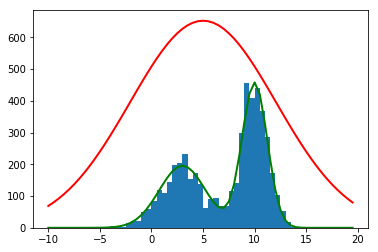

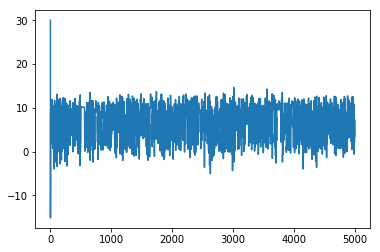

In [30]:
figure(1)
nbins = 30
hist(y, bins = x)
plot(x, px*N/sum(px), color='g', linewidth=2)
plot(x, q(x)*N/sum(px), color='r', linewidth=2)

figure(2)
plot(y)
show()

In [31]:
u2 = random.rand(N)
sigma = 10
y2 = zeros(N)
y2[0] = random.normal(0,sigma)
for i in range(N-1):
    y2new = y2[i] + random.normal(0,sigma)
    alpha = min(1,p(y2new)/p(y2[i]))
    if u2[i] < alpha:
        y2[i+1] = y2new
    else:
        y2[i+1] = y2[i]

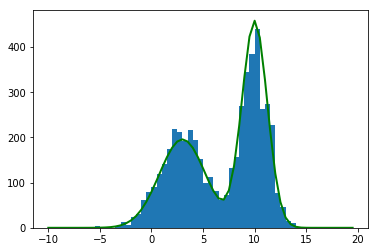

In [32]:
figure(1)
nbins = 30
hist(y2, bins = x)
plot(x, px*N/sum(px), color='g', linewidth=2)

show()